<a href="https://colab.research.google.com/github/porterjenkins/CS180/blob/main/data_science_labs/data_science_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 6

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

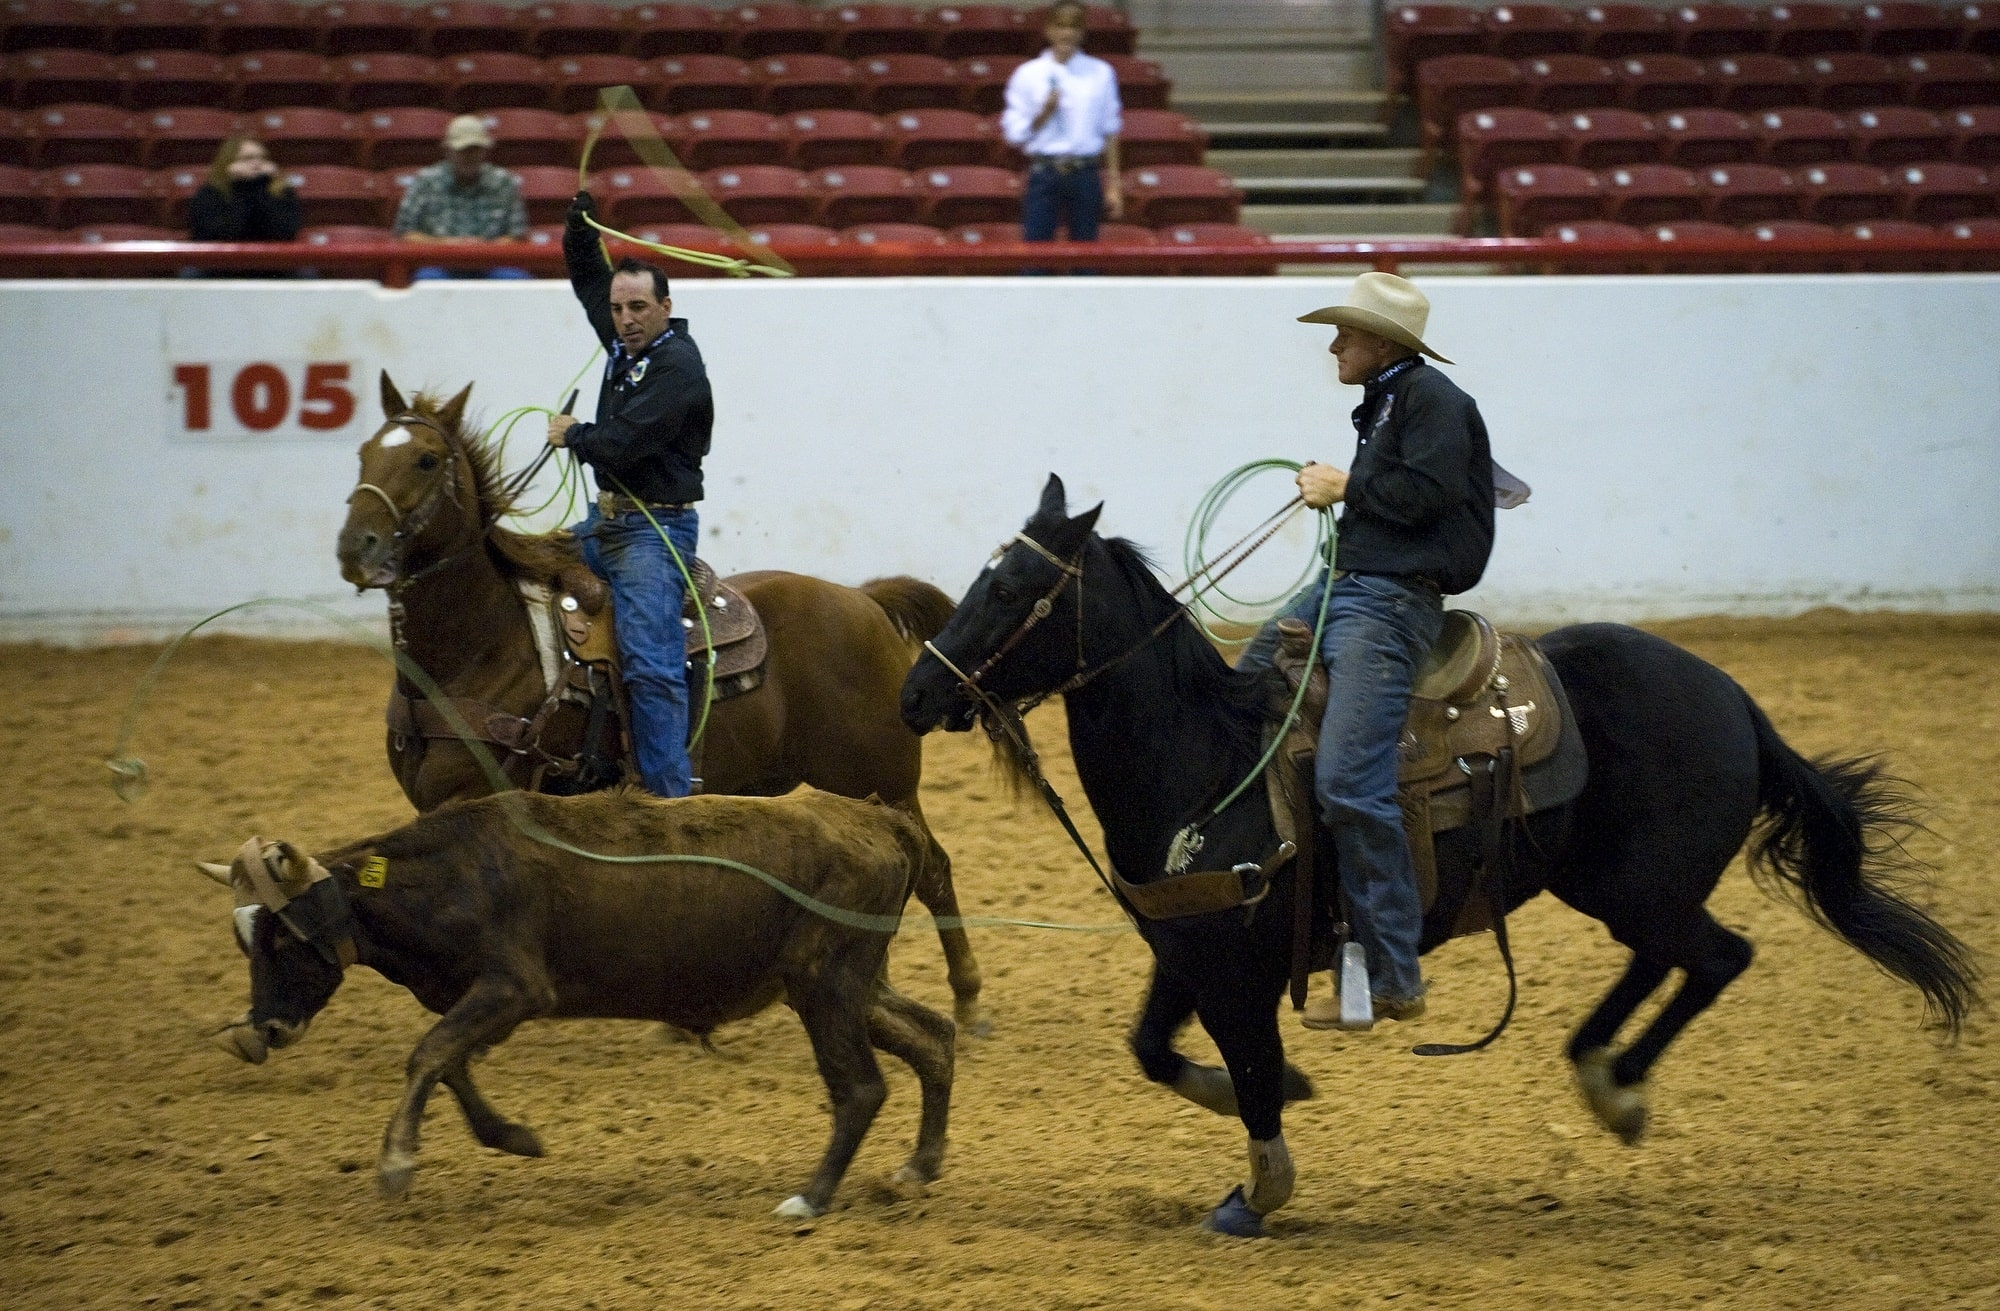

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

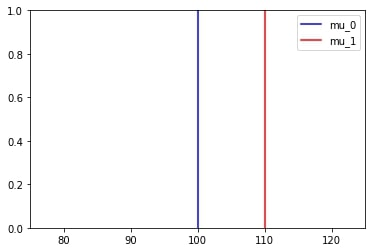

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

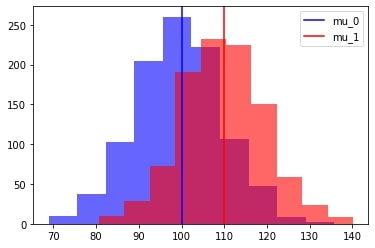

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

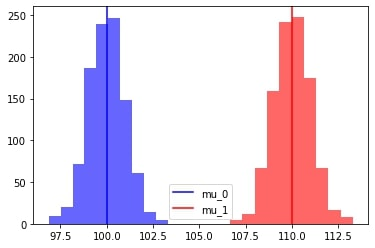

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [1]:
# Download the data by running this cell
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb18.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb19.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb20.csv

--2023-10-26 00:46:50--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71618 (70K) [text/plain]
Saving to: ‘cfb16.csv’

cfb16.csv           100%[===================>]  69.94K  --.-KB/s    in 0.01s   

2023-10-26 00:46:50 (5.04 MB/s) - ‘cfb16.csv’ saved [71618/71618]

--2023-10-26 00:46:51--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [ ]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd
cfb16 = pd.read_csv("cfb16.csv");
cfb17 = pd.read_csv("cfb17.csv");
cfb18 = pd.read_csv("cfb18.csv");
cfb19 = pd.read_csv("cfb19.csv");
cfb20 = pd.read_csv("cfb20.csv");

cfb16['year'] = 2016
cfb17['year'] = 2017
cfb18['year'] = 2018
cfb19['year'] = 2019
cfb20['year'] = 2020

cfb16.to_csv("cfb16.csv", index=False)
cfb17.to_csv("cfb17.csv", index=False)
cfb18.to_csv("cfb18.csv", index=False)
cfb19.to_csv("cfb19.csv", index=False)
cfb20.to_csv("cfb20.csv", index=False)

## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [ ]:
# Write your code to combine all of the csvs into one dataframe here:
file_list = ["cfb16.csv", "cfb17.csv", "cfb18.csv", "cfb19.csv", "cfb20.csv"]
all_years = pd.DataFrame()
dataframes = []

for file in file_list:
  df = pd.read_csv(file)
  dataframes.append(df)

all_years = pd.concat(dataframes, ignore_index=True)

## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [ ]:
# Write your code to parse the conference from the team name:
all_years['Conference'] = df['Team'].str.extract(r'\((.*?)\)')

## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

<ipython-input-5-3bf6070a4e5e>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_ten_data = df[all_years['Conference'] == 'Big Ten']
<ipython-input-5-3bf6070a4e5e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sec_data = df[all_years['Conference'] == 'SEC']
<ipython-input-5-3bf6070a4e5e>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_ten_data['Off.Yards.per.Game'], label='Big Ten', shade=True)
<ipython-input-5-3bf6070a4e5e>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sec_data['Off.Yards.per.Game'], label='SEC', shade=True)


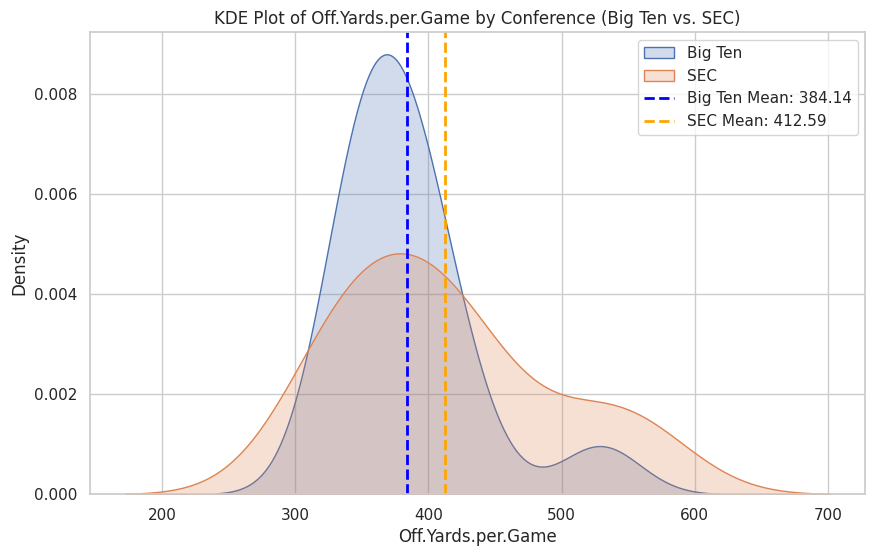

In [ ]:
# Write the code for the statistical differences for Off.Yards.per.Game:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

big_ten_data = df[all_years['Conference'] == 'Big Ten']
sec_data = df[all_years['Conference'] == 'SEC']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(big_ten_data['Off.Yards.per.Game'], label='Big Ten', shade=True)
sns.kdeplot(sec_data['Off.Yards.per.Game'], label='SEC', shade=True)

big_ten_mean = big_ten_data['Off.Yards.per.Game'].mean()
sec_mean = sec_data['Off.Yards.per.Game'].mean()

plt.axvline(big_ten_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Big Ten Mean: {big_ten_mean:.2f}')
plt.axvline(sec_mean, color='orange', linestyle='dashed', linewidth=2, label=f'SEC Mean: {sec_mean:.2f}')

plt.title("KDE Plot of Off.Yards.per.Game by Conference (Big Ten vs. SEC)")
plt.xlabel("Off.Yards.per.Game")
plt.ylabel("Density")
plt.legend()

plt.show()

The SEC has a higher mean and a wider distribution than the Big Ten, so on average the teams had more yards and had more yards on the high end, but they were also less consistent about how many yards they averaged.



<ipython-input-6-ee9da6eadb07>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_ten_data = df[all_years['Conference'] == 'Big Ten']
<ipython-input-6-ee9da6eadb07>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sec_data = df[all_years['Conference'] == 'SEC']
<ipython-input-6-ee9da6eadb07>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_ten_data['Off.TDs'], label='Big Ten', shade=True)
<ipython-input-6-ee9da6eadb07>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sec_data['Off.TDs'], label='SEC', shade=True)


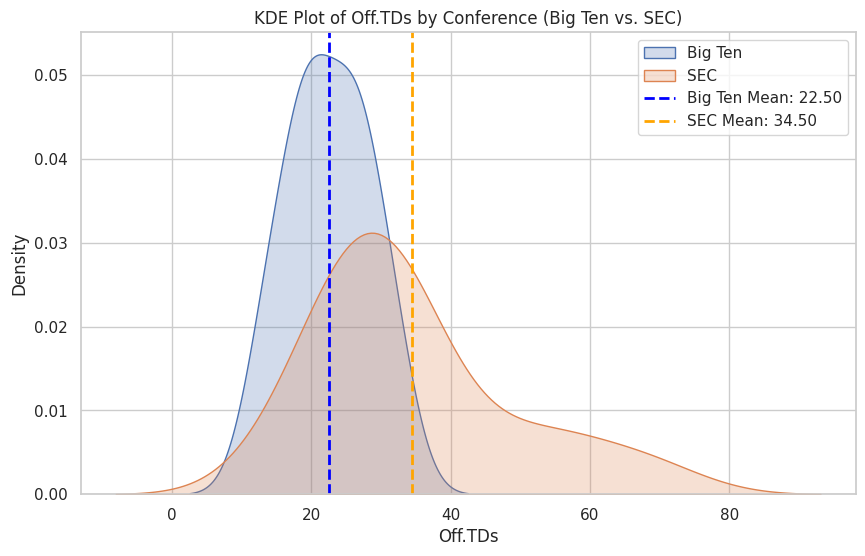

In [ ]:
# Write the code for the statistical differences for Off.TDs:
big_ten_data = df[all_years['Conference'] == 'Big Ten']
sec_data = df[all_years['Conference'] == 'SEC']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(big_ten_data['Off.TDs'], label='Big Ten', shade=True)
sns.kdeplot(sec_data['Off.TDs'], label='SEC', shade=True)

big_ten_mean = big_ten_data['Off.TDs'].mean()
sec_mean = sec_data['Off.TDs'].mean()

plt.axvline(big_ten_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Big Ten Mean: {big_ten_mean:.2f}')
plt.axvline(sec_mean, color='orange', linestyle='dashed', linewidth=2, label=f'SEC Mean: {sec_mean:.2f}')

plt.title("KDE Plot of Off.TDs by Conference (Big Ten vs. SEC)")
plt.xlabel("Off.TDs")
plt.ylabel("Density")
plt.legend()

plt.show()

The SEC had a higher mean when it came to Offensive TDs at 34.5 whereas the Big Ten only had a mean of 22.5 offensive TDs. The densities don't overlap as much as they did for yards, the SEC is a lot less consistent as a whole, but consistently higher.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Alloweed`.



<ipython-input-7-56fec2c13546>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_ten_data = df[all_years['Conference'] == 'Big Ten']
<ipython-input-7-56fec2c13546>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sec_data = df[all_years['Conference'] == 'SEC']
<ipython-input-7-56fec2c13546>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_ten_data['Points.Allowed'], label='Big Ten', shade=True)
<ipython-input-7-56fec2c13546>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sec_data['Points.Allowed'], label='SEC', shade=True)


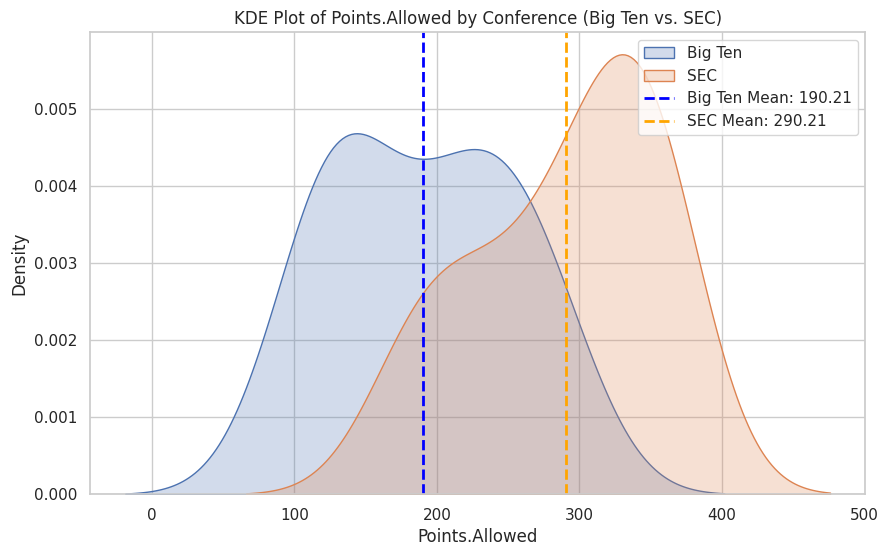

In [ ]:
# Write the code for the statistical differences for Points.Allowed:
big_ten_data = df[all_years['Conference'] == 'Big Ten']
sec_data = df[all_years['Conference'] == 'SEC']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(big_ten_data['Points.Allowed'], label='Big Ten', shade=True)
sns.kdeplot(sec_data['Points.Allowed'], label='SEC', shade=True)

big_ten_mean = big_ten_data['Points.Allowed'].mean()
sec_mean = sec_data['Points.Allowed'].mean()

plt.axvline(big_ten_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Big Ten Mean: {big_ten_mean:.2f}')
plt.axvline(sec_mean, color='orange', linestyle='dashed', linewidth=2, label=f'SEC Mean: {sec_mean:.2f}')

plt.title("KDE Plot of Points.Allowed by Conference (Big Ten vs. SEC)")
plt.xlabel("Points.Allowed")
plt.ylabel("Density")
plt.legend()

plt.show()

The Big Ten mean for Points allowed is much lower (exactly 100 points lower) than the SEC mean for Points Allowed. The density charts have some overlap, but the Big Ten is definitely more defensive as far as points allowed than the SEC is because there isn't a ton of overlap.

<ipython-input-8-678bd68e38cb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_ten_data = df[all_years['Conference'] == 'Big Ten']
<ipython-input-8-678bd68e38cb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sec_data = df[all_years['Conference'] == 'SEC']
<ipython-input-8-678bd68e38cb>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_ten_data['Opp.Pass.Yds.Allowed'], label='Big Ten', shade=True)
<ipython-input-8-678bd68e38cb>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sec_data['Opp.Pass.Yds.Allowed'], label='SEC', shade=True)


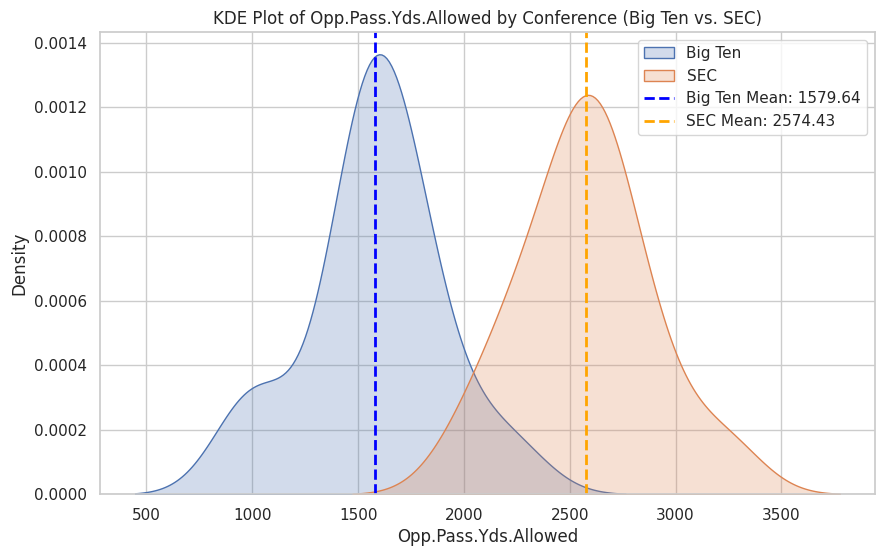

In [ ]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
big_ten_data = df[all_years['Conference'] == 'Big Ten']
sec_data = df[all_years['Conference'] == 'SEC']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(big_ten_data['Opp.Pass.Yds.Allowed'], label='Big Ten', shade=True)
sns.kdeplot(sec_data['Opp.Pass.Yds.Allowed'], label='SEC', shade=True)

big_ten_mean = big_ten_data['Opp.Pass.Yds.Allowed'].mean()
sec_mean = sec_data['Opp.Pass.Yds.Allowed'].mean()

plt.axvline(big_ten_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Big Ten Mean: {big_ten_mean:.2f}')
plt.axvline(sec_mean, color='orange', linestyle='dashed', linewidth=2, label=f'SEC Mean: {sec_mean:.2f}')

plt.title("KDE Plot of Opp.Pass.Yds.Allowed by Conference (Big Ten vs. SEC)")
plt.xlabel("Opp.Pass.Yds.Allowed")
plt.ylabel("Density")
plt.legend()

plt.show()

The mean of the Big Ten is almost 1000 yards less than the mean of the SEC. There is some overlap, but not very much at all, the Big Ten very clearly allows much less passing yards than the SEC does.

<ipython-input-9-b55e1b2ce9c9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  big_ten_data = df[all_years['Conference'] == 'Big Ten']
<ipython-input-9-b55e1b2ce9c9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sec_data = df[all_years['Conference'] == 'SEC']
<ipython-input-9-b55e1b2ce9c9>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_ten_data['Opp.Rush.Yards.Alloweed'], label='Big Ten', shade=True)
<ipython-input-9-b55e1b2ce9c9>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sec_data['Opp.Rush.Yards.Alloweed'], label='SEC', shade=True)


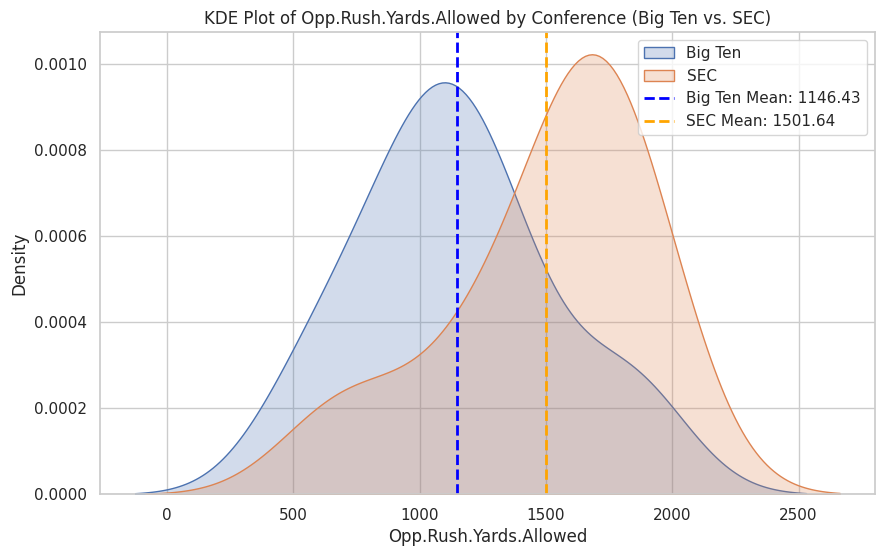

In [ ]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
big_ten_data = df[all_years['Conference'] == 'Big Ten']
sec_data = df[all_years['Conference'] == 'SEC']

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(big_ten_data['Opp.Rush.Yards.Alloweed'], label='Big Ten', shade=True)
sns.kdeplot(sec_data['Opp.Rush.Yards.Alloweed'], label='SEC', shade=True)

big_ten_mean = big_ten_data['Opp.Rush.Yards.Alloweed'].mean()
sec_mean = sec_data['Opp.Rush.Yards.Alloweed'].mean()

plt.axvline(big_ten_mean, color='blue', linestyle='dashed', linewidth=2, label=f'Big Ten Mean: {big_ten_mean:.2f}')
plt.axvline(sec_mean, color='orange', linestyle='dashed', linewidth=2, label=f'SEC Mean: {sec_mean:.2f}')

plt.title("KDE Plot of Opp.Rush.Yards.Allowed by Conference (Big Ten vs. SEC)")
plt.xlabel("Opp.Rush.Yards.Allowed")
plt.ylabel("Density")
plt.legend()

plt.show()

The mean Rush Yards allowed for the SEC is about 350 yards higher than the mean Rush yards allowed by the Big Ten. There is a lot of overlap in the distributions for the two conferences, they are about the same consistency wise with the SEC average being pulled down by a few super low Opp.Rush.Yards.Alloweed values from teams.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

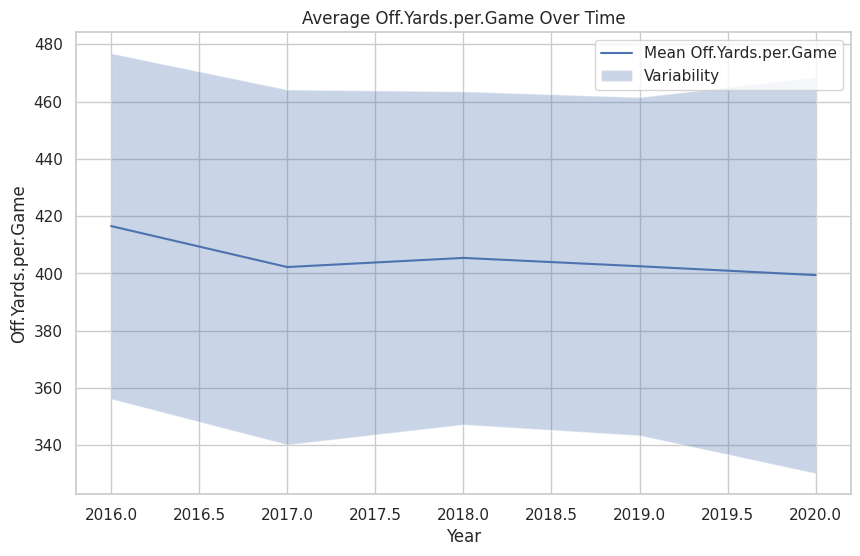

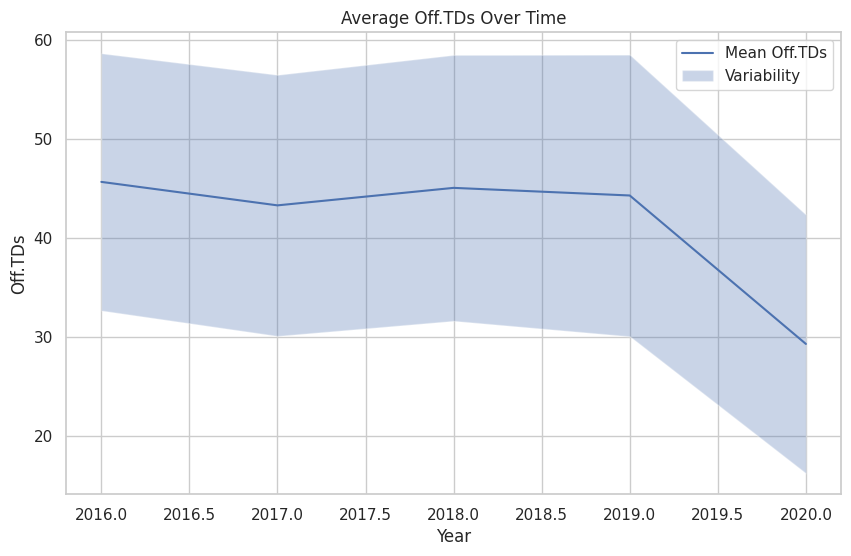

In [ ]:
# Create a few plots showing how each metric changed over time:
metrics = ['Off.Yards.per.Game', 'Off.TDs']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    metric_data = all_years.groupby('year')[metric].agg(['mean', 'std']).reset_index()

    plt.plot(metric_data['year'], metric_data['mean'], label=f'Mean {metric}')

    plt.fill_between(metric_data['year'], metric_data['mean'] - metric_data['std'], metric_data['mean'] + metric_data['std'], alpha=0.3, label=f'Variability')

    plt.title(f'Average {metric} Over Time')
    plt.xlabel('Year')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.show()

The yards per game seems to be going down over time and the Mena offensive TDs is definitely decreasing over time. The trend for yards per game could be spurious because the variablility is large and doesnt move as much as the mean does. The Offensive TDs are likely truely going down over time, and this may be because the offenses are getting worse or because the defenses are allowing less yards and TDs per year/getting better.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

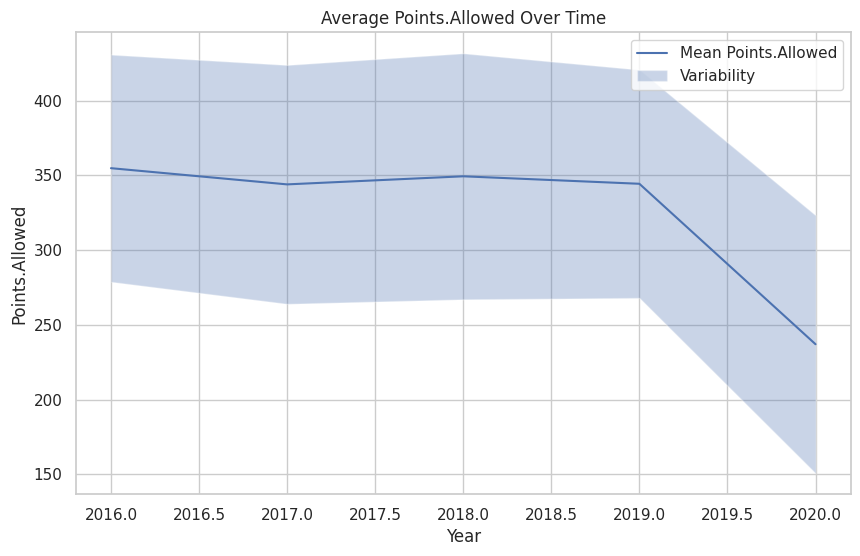

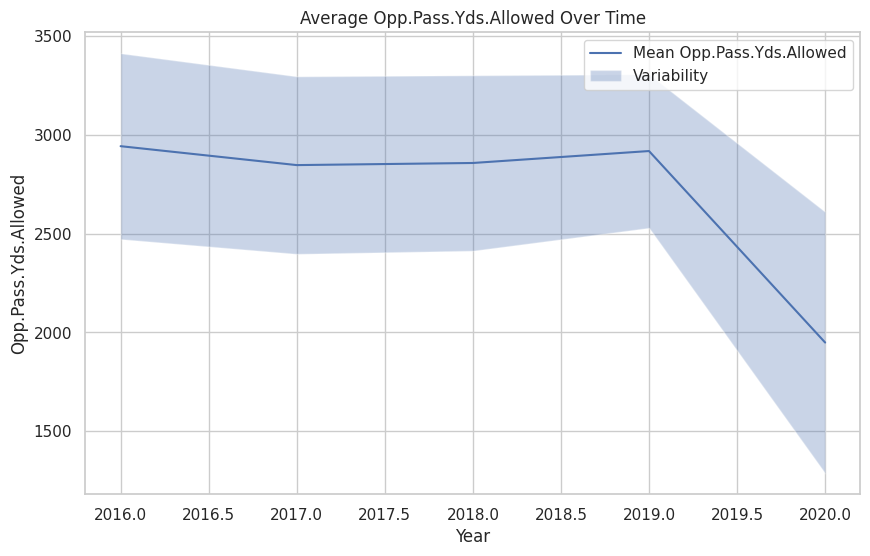

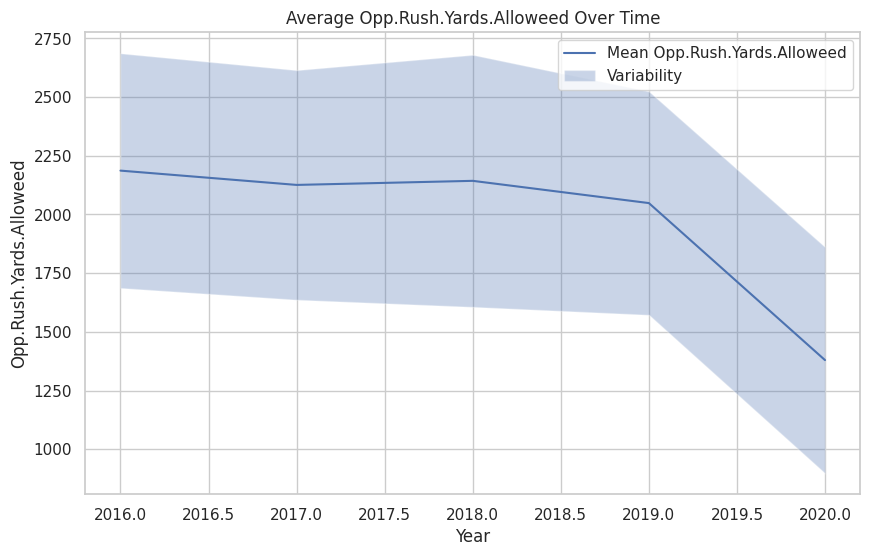

In [ ]:
# Create a few plots showing how each metric changed over time:
metrics = ['Points.Allowed', 'Opp.Pass.Yds.Allowed', 'Opp.Rush.Yards.Alloweed']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")

    metric_data = all_years.groupby('year')[metric].agg(['mean', 'std']).reset_index()

    plt.plot(metric_data['year'], metric_data['mean'], label=f'Mean {metric}')

    plt.fill_between(metric_data['year'], metric_data['mean'] - metric_data['std'], metric_data['mean'] + metric_data['std'], alpha=0.3, label=f'Variability')

    plt.title(f'Average {metric} Over Time')
    plt.xlabel('Year')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.show()

The Rush Yards allowed, Pass Yards allowed and points allowed are all pretty consistent until 2019 and then they all take a sharp turn down where the defenses are allowing less of each category. The pass yards allowed are more likely to be truly going down because there is less variance whereas the points allowed may not be going down as sharply as it appears because the variance is a lot larger.